# Generate a global grid for visualizing the PINN results

After training the PINN, the neural network can calculate the dust flux deposition on any location on earth. For visualization purposes, let us generate a global grid with 3 degrees spacing in both latitude and longitude to visualize the PINN results.

## Preliminaries

Import the necessary libraries and specify the data folders.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize' : 20,
          'lines.linewidth' : 20,
          'legend.fontsize': 20,
          'font.family':'DeJavu Serif',
          'font.serif' :'Times New Roman'}

plt.rcParams.update(params)

In [4]:
FIGURE_PATH = "../Figures/"
DATA_PATH = "../Data/"
DATA_LOAD_PATH = DATA_PATH + "original_data/"
DATA_SAVE_PATH = DATA_PATH + "processed_data/"

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Create and visualize the global grid

The global grid for the predictions consists of 3-degree spacing.

In [6]:
longitude_to_predict = np.linspace(-180., 180., 120)
latitude_to_predict = np.linspace(-90., 90., 60)

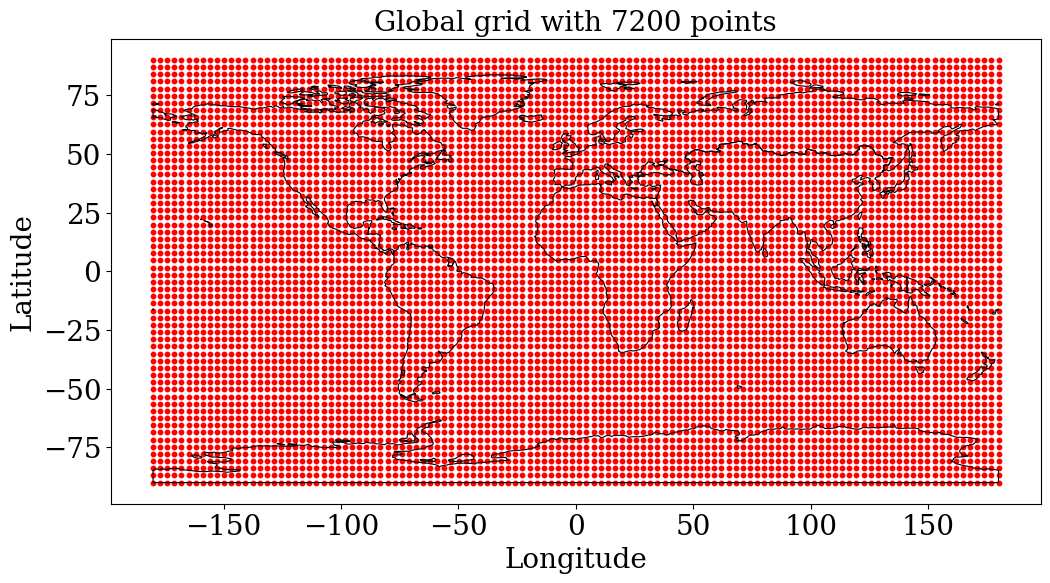

In [7]:
xx, yy = np.meshgrid(longitude_to_predict, latitude_to_predict)
XYpairs = np.vstack([ xx.reshape(-1), yy.reshape(-1) ])
df_dust_geopandas_test = gpd.GeoDataFrame(geometry=gpd.points_from_xy(XYpairs[0], XYpairs[1]))

fig, ax = plt.subplots(figsize=(12,10))
continents = world.dissolve(by='continent')
continents.boundary.plot(ax=ax, color='black', linewidth=.8)
df_dust_geopandas_test.plot(ax=ax, color='red', markersize=10, marker ='o')

ax.set(xlabel='Longitude', ylabel='Latitude',
       title=f'Global grid with {df_dust_geopandas_test.shape[0]} points')
plt.show()

## Export the processed data

In [8]:
df = pd.DataFrame({
    'lon': df_dust_geopandas_test.geometry.x,
    'lat': df_dust_geopandas_test.geometry.y
})

In [9]:
with open(DATA_SAVE_PATH + "df_global_grid.csv", 'w') as f:
    df.to_csv(f, index = False)